In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np

In [2]:
# Reading the dataset and columns that we'd like to work
data = pd.read_csv('fev17.csv',header=None, usecols=[3,4,5,6,7,20,21,22])

d:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Investigate the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149127 entries, 0 to 149126
Data columns (total 8 columns):
3     149127 non-null int64
4     149124 non-null object
5     149127 non-null object
6     149127 non-null object
7     149127 non-null object
20    149127 non-null object
21    149127 non-null object
22    149127 non-null object
dtypes: int64(1), object(7)
memory usage: 9.1+ MB


In [4]:
# columns 20 and 22 have problems (,)
data.head()

,3,4,5,6,7,20,21,22
0,87999734243,87998074931,25/01/2017,QUA,11:57:34,"1,4",MIN,"0,11"
1,81999741361,81999940229,01/02/2017,QUA,16:23:25,"4,5",MIN,"0,00"
2,81999940048,81999940041,16/01/2017,SEG,09:59:30,"13,3",MIN,"0,00"
3,81999940834,81999940834,17/01/2017,TER,05:51:38,"3,9",UNID,"0,00"
4,87992530036,8738714255,24/01/2017,TER,12:07:32,"0,5",MIN,"0,04"


In [5]:
data.tail()

,3,4,5,6,7,20,21,22
149122,87991277829,87991546636,03/02/2017,SEX,19:05:14,"0,6",MIN,"0,04"
149123,81999940834,81996156251,07/02/2017,TER,08:54:55,"0,5",MIN,"0,00"
149124,87999734243,87999981487,27/01/2017,SEX,10:32:34,"3,2",MIN,"0,25"
149125,81999606630,81985672558,06/02/2017,SEG,18:29:23,"1,7",MIN,"0,13"
149126,87996349463,87991643405,12/01/2017,QUI,14:13:38,"2,8",MIN,"0,00"


In [6]:
# Some data follow the format 1.290,00. 
# First of all, eliminate the ".". Thus, 1290,00

data[20] = data[20].str.replace('.','')
data[22] = data[22].str.replace('.','')

In [7]:
# Replace the "," by "."
# 1290,0 -> 1290.0

data[20] = data[20].str.replace(',','.')
data[22] = data[22].str.replace(',','.')

In [8]:
data[20] = data[20].astype(float)

In [9]:
data.head()

,3,4,5,6,7,20,21,22
0,87999734243,87998074931,25/01/2017,QUA,11:57:34,1.4,MIN,0.11
1,81999741361,81999940229,01/02/2017,QUA,16:23:25,4.5,MIN,0.00
2,81999940048,81999940041,16/01/2017,SEG,09:59:30,13.3,MIN,0.00
3,81999940834,81999940834,17/01/2017,TER,05:51:38,3.9,UNID,0.00
4,87992530036,8738714255,24/01/2017,TER,12:07:32,0.5,MIN,0.04


In [10]:
data[5].value_counts()

08/02/2017    6763
01/02/2017    6362
11/01/2017    6322
25/01/2017    6067
31/01/2017    6059
03/02/2017    5948
02/02/2017    5800
30/01/2017    5789
26/01/2017    5722
27/01/2017    5677
10/01/2017    5571
24/01/2017    5479
07/02/2017    5462
12/01/2017    5328
23/01/2017    5325
13/01/2017    5303
18/01/2017    5295
06/02/2017    5243
19/01/2017    5235
16/01/2017    5133
17/01/2017    5130
20/01/2017    5106
09/01/2017    4923
28/01/2017    2831
14/01/2017    2527
04/02/2017    2487
21/01/2017    2373
29/01/2017    2247
05/02/2017    2028
22/01/2017    1893
15/01/2017    1887
08/01/2017    1153
06/01/2017     328
07/01/2017     307
12/12/2016      18
26/08/2016       2
08/12/2016       1
18/07/2016       1
11/12/2016       1
03/01/2017       1
Name: 5, dtype: int64

In [11]:
week = data[6].value_counts()
week

QUA    30809
TER    27702
SEG    26432
SEX    22364
QUI    22086
SAB    10525
DOM     9209
Name: 6, dtype: int64

In [12]:
week = week.loc[['DOM','SEG','TER','QUA','QUI','SEX','SAB']]

In [13]:
# Number of calls by weekdays
week.plot(kind='bar')

In [14]:
week_duration = data.pivot_table(index=6, values=20, aggfunc=np.sum)
week_duration

6
DOM    129885.8
QUA    129370.2
QUI    116172.5
SAB    111010.9
SEG    139832.4
SEX    114478.3
TER    159085.3
Name: 20, dtype: float64

In [15]:
# duration of calls by weekdays
week_duration = week_duration.loc[['DOM','SEG','TER','QUA','QUI','SEX','SAB']]
week_duration.plot(kind='bar')

In [16]:
#pd.to_datetime(, format="%m/%d/%Y")
data[5].unique()

array(['25/01/2017', '01/02/2017', '16/01/2017', '17/01/2017',
       '24/01/2017', '11/01/2017', '27/01/2017', '02/02/2017',
       '30/01/2017', '08/02/2017', '13/01/2017', '10/01/2017',
       '31/01/2017', '26/01/2017', '05/02/2017', '23/01/2017',
       '28/01/2017', '21/01/2017', '06/02/2017', '12/01/2017',
       '04/02/2017', '07/02/2017', '20/01/2017', '03/02/2017',
       '19/01/2017', '18/01/2017', '14/01/2017', '06/01/2017',
       '07/01/2017', '09/01/2017', '15/01/2017', '22/01/2017',
       '29/01/2017', '08/01/2017', '12/12/2016', '26/08/2016',
       '11/12/2016', '08/12/2016', '18/07/2016', '03/01/2017'], dtype=object)

In [17]:
# Transfort data[5] to a datatime type
data[5] = pd.to_datetime(data[5],format='%d/%m/%Y')

In [18]:
# Number of calls by days
days = data[5].value_counts().sort_index()
days.plot(kind='bar')
print(days)

2016-07-18       1
2016-08-26       2
2016-12-08       1
2016-12-11       1
2016-12-12      18
2017-01-03       1
2017-01-06     328
2017-01-07     307
2017-01-08    1153
2017-01-09    4923
2017-01-10    5571
2017-01-11    6322
2017-01-12    5328
2017-01-13    5303
2017-01-14    2527
2017-01-15    1887
2017-01-16    5133
2017-01-17    5130
2017-01-18    5295
2017-01-19    5235
2017-01-20    5106
2017-01-21    2373
2017-01-22    1893
2017-01-23    5325
2017-01-24    5479
2017-01-25    6067
2017-01-26    5722
2017-01-27    5677
2017-01-28    2831
2017-01-29    2247
2017-01-30    5789
2017-01-31    6059
2017-02-01    6362
2017-02-02    5800
2017-02-03    5948
2017-02-04    2487
2017-02-05    2028
2017-02-06    5243
2017-02-07    5462
2017-02-08    6763
Name: 5, dtype: int64


In [19]:
# Transfort data[7] to a datatime type
data[7] = pd.to_datetime(data[7],format='%H:%M:%S')


In [20]:
data[7]

0        1900-01-01 11:57:34
1        1900-01-01 16:23:25
2        1900-01-01 09:59:30
3        1900-01-01 05:51:38
4        1900-01-01 12:07:32
5        1900-01-01 08:53:19
6        1900-01-01 08:50:12
7        1900-01-01 07:53:17
8        1900-01-01 09:41:27
9        1900-01-01 16:12:23
10       1900-01-01 18:02:19
11       1900-01-01 13:13:11
12       1900-01-01 09:39:10
13       1900-01-01 00:00:00
14       1900-01-01 15:13:45
15       1900-01-01 12:59:19
16       1900-01-01 00:00:00
17       1900-01-01 08:32:27
18       1900-01-01 08:44:15
19       1900-01-01 09:57:07
20       1900-01-01 11:27:35
21       1900-01-01 11:28:17
22       1900-01-01 09:07:46
23       1900-01-01 08:46:27
24       1900-01-01 15:32:00
25       1900-01-01 00:52:48
26       1900-01-01 16:11:01
27       1900-01-01 12:19:22
28       1900-01-01 19:53:15
29       1900-01-01 13:53:03
                 ...        
149097   1900-01-01 11:53:34
149098   1900-01-01 14:13:11
149099   1900-01-01 11:02:17
149100   1900-

In [21]:
# Analyze the shape of occurence calls for Tuesday

tuesday = data[data[6] == 'TER']
tuesday

,3,4,5,6,7,20,21,22
3,81999940834,81999940834,2017-01-17,TER,1900-01-01 05:51:38,3.9,UNID,0.00
4,87992530036,8738714255,2017-01-24,TER,1900-01-01 12:07:32,0.5,MIN,0.04
6,87999912238,87999150500,2017-01-24,TER,1900-01-01 08:50:12,1.7,MIN,0.13
7,81999745224,81989157616,2017-01-17,TER,1900-01-01 07:53:17,2.0,MIN,0.00
10,81999760969,81999940098,2017-01-24,TER,1900-01-01 18:02:19,2.8,MIN,0.26
18,81998030076,81987110866,2017-01-17,TER,1900-01-01 08:44:15,1.1,MIN,0.00
20,81998190233,81999130658,2017-01-10,TER,1900-01-01 11:27:35,1.9,MIN,0.00
21,81998190233,81996150771,2017-01-31,TER,1900-01-01 11:28:17,10.7,MIN,0.00
33,81999170694,81997691832,2017-01-17,TER,1900-01-01 20:14:51,1.2,MIN,0.00
34,81999220095,81994236433,2017-01-24,TER,1900-01-01 10:03:20,0.5,MIN,0.04


In [22]:
tuesday.set_index(7, drop=False, inplace=True)

In [23]:
tuesday.groupby(pd.TimeGrouper(freq='60Min')).count().plot(kind='bar')

In [24]:
# Analyze the shape of occurence calls for Sunday

sunday = data[data[6] == 'DOM']
sunday

,3,4,5,6,7,20,21,22
24,81998190700,8132172624,2017-02-05,DOM,1900-01-01 15:32:00,1.2,MIN,0.09
95,81994073995,81994073995,2017-02-05,DOM,1900-01-01 00:03:57,2.0,UNID,0.00
97,81994183140,81989970959,2017-02-05,DOM,1900-01-01 12:47:11,5.8,MIN,0.46
200,81999940394,81992487761,2017-01-15,DOM,1900-01-01 15:49:30,1.0,UNID,0.00
228,81994023290,81994779054,2017-01-22,DOM,1900-01-01 23:59:36,0.5,MIN,0.04
245,81995280100,71999885300,2017-01-22,DOM,1900-01-01 08:32:03,2.0,UNID,0.00
254,81996158514,81988922910,2017-01-15,DOM,1900-01-01 11:17:58,0.5,MIN,0.00
262,81996491114,81996491114,2017-02-05,DOM,1900-01-01 09:20:40,16.2,UNID,0.00
273,81997285859,81997116179,2017-01-29,DOM,1900-01-01 14:21:43,1.3,MIN,0.10
281,81997573939,81997900019,2017-01-29,DOM,1900-01-01 21:33:39,1.0,UNID,0.00


In [25]:
sunday.set_index(7, drop=False, inplace=True)

In [26]:
sunday.groupby(pd.TimeGrouper(freq='60Min')).count().plot(kind='bar')

In [27]:
data.dtypes

3              int64
4             object
5     datetime64[ns]
6             object
7     datetime64[ns]
20           float64
21            object
22            object
dtype: object

In [28]:
data.pivot_table(index=5, values=20, aggfunc=np.sum)

5
2016-07-18        0.1
2016-08-26        0.2
2016-12-08        1.8
2016-12-11        0.1
2016-12-12      112.8
2017-01-03        0.5
2017-01-06      820.1
2017-01-07      715.7
2017-01-08    22356.6
2017-01-09    26380.4
2017-01-10    38750.5
2017-01-11    29260.5
2017-01-12    28250.0
2017-01-13    32139.5
2017-01-14    28298.6
2017-01-15    32307.1
2017-01-16    29797.6
2017-01-17    25092.4
2017-01-18    27430.4
2017-01-19    29721.1
2017-01-20    30910.6
2017-01-21    35176.9
2017-01-22    28207.5
2017-01-23    30678.2
2017-01-24    36452.5
2017-01-25    36881.7
2017-01-26    36338.0
2017-01-27    33808.0
2017-01-28    32056.6
2017-01-29    30848.9
2017-01-30    33846.7
2017-01-31    34958.2
2017-02-01    30808.0
2017-02-02    21861.6
2017-02-03    16799.9
2017-02-04    14763.1
2017-02-05    16165.6
2017-02-06    19016.6
2017-02-07    23831.2
2017-02-08     4989.6
Name: 20, dtype: float64

## Network Analysis

In [29]:
# Create an unweighted directed graph using the NetworkX's
# from_pandas_dataframe method with Follower as the source and User as the target.
G = nx.from_pandas_dataframe(data, source=3, target=4, edge_attr=20, create_using=nx.DiGraph())

In [30]:
print('#Nodes: ', len(G.nodes()))
print('#Edges: ', len(G.edges()))

#Nodes:  26243
#Edges:  51990


In [31]:
nx.info(G)

'Name: \nType: DiGraph\nNumber of nodes: 26243\nNumber of edges: 51990\nAverage in degree:   1.9811\nAverage out degree:   1.9811'

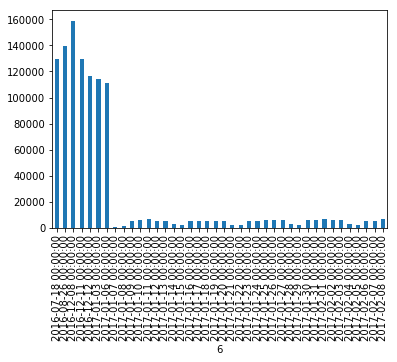

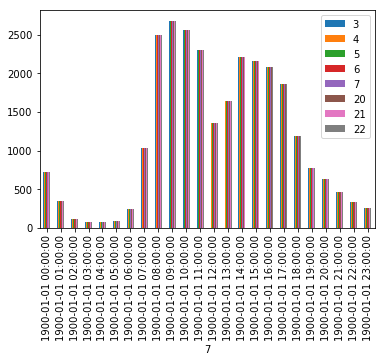

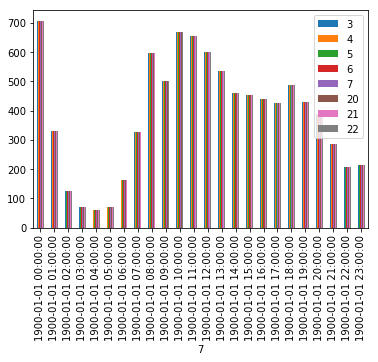

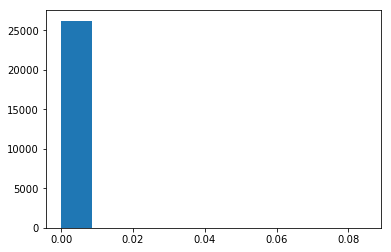

In [32]:
# Degree Centrality: Number of connections. 
# An important node is involved in a large number of interactions.

# Compute the degree centrality of the network: deg_cent
deg_cent = nx.degree_centrality(G)

# Plot a histogram of the degree centrality distribution of the graph.
plt.figure()
plt.hist(list(deg_cent.values()))
plt.show()

In [33]:
# G.degree_iter() - return a list (phone_number,degree)
# itemgetter(1) - will consider "degree" as metric to sort
degree_sorted = sorted(G.degree_iter(),key=itemgetter(1),reverse=True)

In [34]:
degree_sorted

[(81997285888, 2226),
 (81997285859, 2218),
 (81994034859, 1607),
 (81994023290, 1560),
 (81999366456, 1368),
 (81999606630, 265),
 (81999940394, 233),
 (81996012803, 215),
 (87996080029, 202),
 (81996074895, 201),
 (81992226493, 197),
 (81996011257, 197),
 (81998190666, 195),
 (81999133368, 195),
 (81999940371, 193),
 (81997340648, 193),
 (81998440025, 192),
 (81999261214, 191),
 (81996959956, 191),
 (81999940081, 190),
 (81996018109, 189),
 (81996040194, 186),
 (81998190405, 186),
 (81979084822, 182),
 (81999279666, 182),
 (81999940126, 181),
 (87991076561, 180),
 (81999744904, 178),
 (81995190220, 178),
 (81997056629, 178),
 (81999745224, 177),
 (81998151117, 177),
 (81996156222, 169),
 (81999360395, 169),
 (81996016025, 168),
 (81998750333, 165),
 (81997086395, 162),
 (81996673000, 161),
 (87999600500, 159),
 (81999009766, 157),
 (81999940402, 156),
 (81999130658, 155),
 (81999940063, 154),
 (81998190770, 150),
 (81996156240, 150),
 (87998151116, 150),
 (81996959970, 149),
 (819999

In [35]:
# Eigenvector Centrality: An important node is connected to important neighbors.

# Compute the eigenvector centrality of the network: eig_cent
eig_cent = nx.eigenvector_centrality(G)

In [36]:
# eig_cent.item() - will return a iterator to a dictionary (key,value)
# key is the phone_number and value is eigenvector centrality

eig_sorted = sorted(eig_cent.items(),key=itemgetter(1),reverse=True)

In [37]:
eig_sorted

[(81996040194, 0.16135269777810202),
 (81992226493, 0.14258687769141137),
 (81999360395, 0.14113154810010714),
 (81999942422, 0.13100910593528364),
 (81997056629, 0.12995859704296872),
 (81997340648, 0.1282980523986787),
 (81994185700, 0.1230832544586056),
 (81996074895, 0.11803943912017814),
 (81996018109, 0.11595645429865382),
 (81999713767, 0.11434532323468354),
 (81996156251, 0.11185683286405229),
 (81996050304, 0.11014947438294881),
 (81998440025, 0.10410110575636793),
 (81999045684, 0.10270458415829514),
 (81999940228, 0.09912891970696498),
 (81999281725, 0.09790514514615704),
 (81999149028, 0.0978401410584018),
 (81979107445, 0.09453107276383842),
 (81999940098, 0.09438390599532298),
 (81998190770, 0.08965061373146871),
 (81996011257, 0.08820864006668704),
 (81999133368, 0.08799094738709673),
 (8132172624, 0.0873863059198817),
 (81998030076, 0.08656545737062572),
 (81999547855, 0.08209952788638263),
 (81992717609, 0.08169886043696137),
 (81999170694, 0.08062887792980852),
 (8199

In [38]:
# Closeness Centrality: Average length of the shortest paths between 
# a specific node and all other nodes in the graph. 
# An important node is typically close to, and can communicate quickly with, 
# the other nodes in the network.

# Compute the closeness centrality of the network: clos_cent
clos_cent = nx.closeness_centrality(G)
clos_sorted = sorted(clos_cent.items(),key=itemgetter(1),reverse=True)

In [39]:
clos_sorted[0:10]

[(81997285888, 0.3464291140231265),
 (81997285859, 0.3462800310328135),
 (81994023290, 0.33816450967793654),
 (81994034859, 0.33376942306753543),
 (81999366456, 0.32353875413284056),
 (81997340648, 0.3085993240355837),
 (81999745224, 0.2903346385634674),
 (81999606630, 0.28936712325569086),
 (81996018109, 0.28856807233795756),
 (81999149028, 0.2863533472124826)]

In [40]:
eig_sorted[0:10]

[(81996040194, 0.16135269777810202),
 (81992226493, 0.14258687769141137),
 (81999360395, 0.14113154810010714),
 (81999942422, 0.13100910593528364),
 (81997056629, 0.12995859704296872),
 (81997340648, 0.1282980523986787),
 (81994185700, 0.1230832544586056),
 (81996074895, 0.11803943912017814),
 (81996018109, 0.11595645429865382),
 (81999713767, 0.11434532323468354)]

In [41]:
degree_sorted[0:10]

[(81997285888, 2226),
 (81997285859, 2218),
 (81994034859, 1607),
 (81994023290, 1560),
 (81999366456, 1368),
 (81999606630, 265),
 (81999940394, 233),
 (81996012803, 215),
 (87996080029, 202),
 (81996074895, 201)]